## Predict Category of News Using Labeled NYT Data



- Take out the rows that are in category :-  'Gen Soft', 'Misc', 'Week in Review', 'Magazine', 'Home Desk', 'Cars', 'Living', 'Personal Finance'
- Take out the rows that are shorter than 150 characters
- Stratified random sampling 7000 rows for each categories (17 categories)
- Split 80% for trained dataset and 20% for test dataset
- Feature extraction (unigram/bigram/trigram) by take out the n-grams that are occurrence less than 0.05% or greater than 50% of trained dataset
- Fit the model using LinearSVC

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../../../nyt_data/nyt_recode_clean.csv.bz2', nrows=10)
select_cols = "categories, OnlineMSoft, NewsDeskSoft, Publication.Date, Publication.Year, Section, Body, Lead.Paragraph, Headline, Online.Headline, Online.Lead.Paragraph, Url, Online.Section, ID"
select_cols = [c.strip() for c in select_cols.split(',')]
for c in select_cols:
    if c not in df.columns:
        print(c)

In [3]:
df = pd.read_csv('../../../nyt_data/nyt_recode_clean.csv.bz2', usecols=select_cols)
df.dropna(subset=['Body'], inplace=True)

/opt/venv37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df

,ID,Body,Headline,Lead.Paragraph,Online.Headline,Online.Lead.Paragraph,Online.Section,Publication.Date,Publication.Year,Section,Url,categories,OnlineMSoft,NewsDeskSoft
0,1,lead 3 compani report 3aar corp nyse qtr nov 3...,AAR CORP reports earnings for Qtr to Nov 30,LEAD: *3*** COMPANY REPORTS ** *3*AAR CORP (NY...,NaN,NaN,Business,19870101T000000,1987.0,1,http://query.nytimes.com/gst/fullpage.html?res...,Business Finance,0,False
1,2,lead 3 compani report 3american cytogenet otc ...,AMERICAN CYTOGENETICS reports earnings for Qtr...,LEAD: *3*** COMPANY REPORTS ** *3*AMERICAN CYT...,NaN,NaN,Business,19870101T000000,1987.0,1,http://query.nytimes.com/gst/fullpage.html?res...,Business Finance,0,False
2,3,lead 3 compani report 3appli power otc qtr nov...,APPLIED POWER reports earnings for Qtr to Nov 30,LEAD: *3*** COMPANY REPORTS ** *3*APPLIED POWE...,NaN,NaN,Business,19870101T000000,1987.0,1,http://query.nytimes.com/gst/fullpage.html?res...,Business Finance,0,False
3,4,lead 3 compani report 3barrett resourc otc yea...,BARRETT RESOURCES reports earnings for Year to...,LEAD: *3*** COMPANY REPORTS ** *3*BARRETT RESO...,NaN,NaN,Business,19870101T000000,1987.0,1,http://query.nytimes.com/gst/fullpage.html?res...,Business Finance,0,False
4,5,lead 3 compani report 3canaver intern otc year...,CANAVERAL INTERNATIONAL reports earnings for Y...,LEAD: *3*** COMPANY REPORTS ** *3*CANAVERAL IN...,NaN,NaN,Business,19870101T000000,1987.0,1,http://query.nytimes.com/gst/fullpage.html?res...,Business Finance,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870358,1870359,edit error articl busi day may 2 expans latin ...,Corrections: For the Record,"Because of an editing error, an article in Bus...",NaN,NaN,Corrections; New York and Region,20070619T000000,2007.0,A,http://query.nytimes.com/gst/fullpage.html?res...,Local,0,False
1870359,1870360,articl bloomberg news busi day june 13 fraud t...,Corrections: For the Record,An article by Bloomberg News in Business Day o...,NaN,NaN,Corrections; New York and Region,20070619T000000,2007.0,A,http://query.nytimes.com/gst/fullpage.html?res...,Local,0,False
1870360,1870361,articl busi day yesterday pari air show missta...,Corrections: For the Record,An article in Business Day yesterday about the...,NaN,NaN,Corrections; New York and Region,20070619T000000,2007.0,A,http://query.nytimes.com/gst/fullpage.html?res...,Local,0,False
1870361,1870362,music review weekend friday paul mccartney hig...,Corrections: For the Record,A music review in Weekend on Friday about Paul...,NaN,NaN,Corrections; New York and Region,20070619T000000,2007.0,A,http://query.nytimes.com/gst/fullpage.html?res...,Local,0,False


In [5]:
df.groupby('categories').size()

categories
Arts                111398
Books                33029
Business Finance    344409
Cars                  2581
Classifieds         131344
Dining                9069
Editorial           132578
Foreign News        130938
Gen Soft             48196
Health                4710
Home Desk             8607
Leisure              44043
Living                6970
Local               347312
Magazine             28141
Misc                 10979
National            145696
Obits                20088
Personal Finance      1045
Real Estate          18159
Science              14008
Sports              176497
Style                35636
Travel               27562
Week in Review       23521
dtype: int64

### Let all other categories ==> Other

In [6]:
df.loc[df.categories.isnull() | df.categories.isin(['Gen Soft', 'Misc', 'Week in Review', 'Magazine', 'Home Desk', 'Cars', 'Living', 'Personal Finance']), 'categories'] = 'Other'

In [7]:
df.groupby('categories').size()

categories
Arts                111398
Books                33029
Business Finance    344409
Classifieds         131344
Dining                9069
Editorial           132578
Foreign News        130938
Health                4710
Leisure              44043
Local               347312
National            145696
Obits                20088
Other               143886
Real Estate          18159
Science              14008
Sports              176497
Style                35636
Travel               27562
dtype: int64

In [8]:
pd.set_option('max_colwidth', 120)
df[df.Body.str.len() < 150][['Body', 'Url']]

,Body,Url
540,lead better 86 presid reagan ask new year 161 better 86 presid reagan ask new year 161,http://query.nytimes.com/gst/fullpage.html?res=9B0DEFD91738F930A35752C0A961948260
900,lead freshmen athlet elig elig judith dorphley upper montclair nj freshmen athlet elig elig judith dorphley upper mo...,http://query.nytimes.com/gst/fullpage.html?res=9B0DE5DD1E3BF937A35752C0A961948260
1232,lead malici fire arson secretari justic hector rivera cruz puerto rico a16 malici fire arson secretari justic hector...,http://query.nytimes.com/gst/fullpage.html?res=9B0DE6DC153DF936A35752C0A961948260
1388,lead branch rockefel center christma tree cut tree taken yesterday ap branch rockefel center christma tree cut tree ...,http://query.nytimes.com/gst/fullpage.html?res=9B0DE6DB123FF935A35752C0A961948260
1486,lead hedi halpert name presid bmt public divis tribuneswabfox compani hedi halpert name presid bmt public divis trib...,http://query.nytimes.com/gst/fullpage.html?res=9B0DE6DD143EF935A35752C0A961948260
...,...,...
1870191,two thing poverti smuggl ibrahim sawarka life egypt along sinai border a1,http://query.nytimes.com/gst/fullpage.html?res=9502E6D8123FF93AA25755C0A9619C8B63
1870214,broadway reviv eric bogosian talk radio star liev schreiber close sunday 150 perform longacr theater art briefli,http://query.nytimes.com/gst/fullpage.html?res=9E01E5DF133FF93AA25755C0A9619C8B63
1870311,na,http://query.nytimes.com/gst/fullpage.html?res=9C0CE5DE133FF93AA25755C0A9619C8B63
1870360,articl busi day yesterday pari air show misstat boe manufactur schedul 787 plane roll boe plant everett wash juli 8 ...,http://query.nytimes.com/gst/fullpage.html?res=9A01E7DB1530F93AA25755C0A9619C8B63


### Take out the Body text shorter than 150 characters

In [9]:
df = df[df.Body.str.len() > 150]
df.groupby(['categories']).size()

categories
Arts                109614
Books                32788
Business Finance    336024
Classifieds         107555
Dining                8917
Editorial           131734
Foreign News        125306
Health                4709
Leisure              43740
Local               318471
National            139573
Obits                20086
Other               139631
Real Estate          17786
Science              13822
Sports              173102
Style                33631
Travel               26613
dtype: int64

In [10]:
!pip install nltk

You should consider upgrading via the '/opt/venv37/bin/python -m pip install --upgrade pip' command.


In [11]:
import time
import re
import string

import numpy as np
import nltk
from nltk import word_tokenize          
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

stemmer = PorterStemmer()
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize_with_punc(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

def tokenize(text):
    text = "".join([ch for ch in text if ch not in string.punctuation])
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

with open('../../../roberts_rules/all_text.txt', 'rt') as f:
    text = f.read()
text = re.sub(r'\d+', '', text)

vect = CountVectorizer(tokenizer=tokenize, stop_words='english', ngram_range=(2, 3)) 
vect.fit([text])
roberts_rules = set(vect.get_feature_names())


def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print(classlabel, feat, coef)

def most_informative_feature_for_class_svm(vectorizer, classifier,  n=10):
    labelid = 3 # this is the coef we're interested in. 
    feature_names = vectorizer.get_feature_names()
    svm_coef = classifier.coef_.toarray() 
    topn = sorted(zip(svm_coef[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print(feat, coef)
        
def print_top10(vectorizer, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    for i, class_label in enumerate(class_labels):
        top10 = np.argsort(clf.coef_[i])[-10:]
        print("%s: %s" % (class_label,
              " | ".join(feature_names[j] for j in top10)))

def get_top_features(vectorizer, clf, class_labels, n=20):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    top_features = {}
    for i, class_label in enumerate(class_labels):
        topN = np.argsort(clf.coef_[i])[-n:]
        top_features[class_label] = [feature_names[j] for j in topN][::-1]
    return top_features

def show_most_informative_features(vectorizer, clf, n=20):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-20s\t\t%.4f\t%-20s" % (coef_1, fn_1, coef_2, fn_2))

def get_most_informative_features(vectorizer, clf, n=20):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top_a = coefs_with_fns[:n]
    top_b = coefs_with_fns[:-(n + 1):-1]
    return top_a, top_b

/opt/venv37/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/opt/venv37/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/opt/venv37/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', '

### Stratified Sampling

In [12]:
#SAMPLE_SIZE_PER_CAT = 4000 ==> 0.85
#SAMPLE_SIZE_PER_CAT = 6000 ==> 0.86
SAMPLE_SIZE_PER_CAT = 7000
sdf = pd.DataFrame()
for c in df.categories.unique():
    sdf = sdf.append(df[df.categories == c].sample(SAMPLE_SIZE_PER_CAT, random_state=21, replace=True))

In [13]:
sdf.groupby(['categories']).size()

categories
Arts                7000
Books               7000
Business Finance    7000
Classifieds         7000
Dining              7000
Editorial           7000
Foreign News        7000
Health              7000
Leisure             7000
Local               7000
National            7000
Obits               7000
Other               7000
Real Estate         7000
Science             7000
Sports              7000
Style               7000
Travel              7000
dtype: int64

In [14]:
sdf[['ID', 'Body', 'categories']].to_csv('nyt_sample_7k.csv', index=False)

X = sdf.Body
y = sdf.categories

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [15]:
X = sdf[['ID', 'Body']]
y = sdf.categories

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [16]:
X_test_data = X_test.copy()
X_train = X_train.Body
X_test = X_test.Body

In [17]:
import re

def custom_tokenizer(doc):
    doc = re.sub('\d+', '[NUM]', doc)
    return doc.split()

In [18]:
vect = CountVectorizer(ngram_range=(1, 3), min_df=0.0005, max_df=0.5, tokenizer=custom_tokenizer, max_features=20000)
#vect = CountVectorizer(ngram_range=(1, 3), min_df=10, max_df=0.3, tokenizer=custom_tokenizer, max_features=10000)
#vect = CountVectorizer(ngram_range=(1, 3), min_df=200, max_df=0.3, tokenizer=custom_tokenizer)

In [19]:
%%time
X_train = vect.fit_transform(X_train)
transformer = TfidfTransformer()
X_train = transformer.fit_transform(X_train)

CPU times: user 7min 50s, sys: 11.1 s, total: 8min 2s
Wall time: 8min 1s


In [20]:
len(vect.vocabulary_)

20000

In [21]:
%%time
X_test = vect.transform(X_test)
transformer = TfidfTransformer()
X_test = transformer.fit_transform(X_test)

CPU times: user 30.9 s, sys: 132 ms, total: 31.1 s
Wall time: 31.1 s


In [22]:
len(vect.vocabulary_)

20000

In [23]:
%%time
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

est = LinearSVC(penalty='l1', dual=False, tol=1e-3)

# Calibrated with isotonic calibration
clf = CalibratedClassifierCV(est, cv=2, method='isotonic')

t0 = time.time()
clf.fit(X_train, y_train)
t1 = time.time()
y_pred = clf.predict(X_test)
t2 = time.time()
time_clf_train = t1-t0
time_clf_predict = t2-t1
print("Results for classifier")
print("Training time: %fs; Prediction time: %fs" % (time_clf_train, time_clf_predict))
print(classification_report(y_test, y_pred))

Results for classifier
Training time: 491.735319s; Prediction time: 0.391019s
                  precision    recall  f1-score   support

            Arts       0.64      0.68      0.66      1400
           Books       0.90      0.95      0.93      1400
Business Finance       0.87      0.86      0.87      1400
     Classifieds       0.99      0.99      0.99      1400
          Dining       0.88      0.96      0.92      1400
       Editorial       0.83      0.82      0.83      1400
    Foreign News       0.83      0.88      0.85      1400
          Health       0.83      0.92      0.88      1400
         Leisure       0.79      0.73      0.76      1400
           Local       0.74      0.62      0.68      1400
        National       0.71      0.69      0.70      1400
           Obits       0.92      0.96      0.94      1400
           Other       0.72      0.48      0.58      1400
     Real Estate       0.88      0.94      0.91      1400
         Science       0.79      0.84      0.81    

In [24]:
f1_score(y_test, y_pred, average='macro')

0.8255959331242558

In [25]:
len(vect.vocabulary_)

20000

In [26]:
# FIXME: Only for first fold of cross validation
most_informative_feature_for_class(vect, clf.calibrated_classifiers_[0].base_estimator, 'Arts')

Arts citi center 2.803305744704265
Arts [NUM] copi 2.859413954345392
Arts [NUM] rate 3.0643098168843674
Arts tommasini 3.2833086543291317
Arts execut produc 3.572924750276066
Arts thursday night 3.820256082597567
Arts [NUM] minut [NUM] 3.9823500834966947
Arts [NUM] page 5.1409699681258045
Arts illustr [NUM] 6.008088956211029
Arts book time 10.607171931528157


In [27]:
print_top10(vect, clf.calibrated_classifiers_[0].base_estimator, clf.classes_)

Arts: citi center | [NUM] copi | [NUM] rate | tommasini | execut produc | thursday night | [NUM] minut [NUM] | [NUM] page | illustr [NUM] | book time
Books: review | doubleday [NUM] | pp | nonfict | [NUM] pp new | illustr [NUM] pp | paper [NUM] | simon schuster [NUM] | pp new | [NUM] pp
Business Finance: compani said | public space | commerc depart | plc | media busi advertis | [NUM] net | [NUM] compani report | media busi | busi travel | compani news
Classifieds: ct | sympathi | januari [NUM] [NUM] | lieu | grandchildren | servic held | [NUM]th [NUM] | surviv | septemb [NUM] | belov
Dining: hesser | winemak | sound level | last wednesday | extra virgin oliv | florenc fabric | eat well | addit capsul review | [NUM] best dish | food stuff
Editorial: march [NUM] [NUM] | jan [NUM] [NUM] | nov [NUM] [NUM] | aug [NUM] [NUM] | feb [NUM] [NUM] | dec [NUM] [NUM] | front page | news articl | [NUM] [NUM] writer | ope
Foreign News: said telephon | said unit | decre | american offici | gener assem

In [28]:
top_features = get_top_features(vect, clf.calibrated_classifiers_[0].base_estimator, clf.classes_, n=100)
top_features_df = pd.DataFrame(top_features)
top_features_df.to_csv('./reports/us_categories_top100_other_calibrated.csv', index=False)
top_features_df

,Arts,Books,Business Finance,Classifieds,Dining,Editorial,Foreign News,Health,Leisure,Local,National,Obits,Other,Real Estate,Science,Sports,Style,Travel
0,book time,[NUM] pp,compani news,belov,food stuff,ope,nyt,vital sign,art review,total time [NUM],town [NUM],die yesterday,weddingscelebr,[NUM]bath [NUM]yearold,scienc watch,sport peopl,puls,travel advisori
1,illustr [NUM],pp new,busi travel,septemb [NUM],[NUM] best dish,[NUM] [NUM] writer,diplomat said,bottom line,street soho,next sunday,[NUM] campaign,year old mr,marri yesterday,hw floor,c claiborn ray,ioc,nadin,practic travel
2,[NUM] page,simon schuster [NUM],media busi,surviv,addit capsul review,news articl,today,lead author,sunday night [NUM],assemblyman,gov,die,last week,streetscap,question scienc,nba,[NUM]by[NUM]ft lot,lead editor
3,[NUM] minut [NUM],paper [NUM],[NUM] compani report,[NUM]th [NUM],eat well,front page,excerpt,mri,book time,washington height,today,die tuesday,bridegroom,walkup,editor re,mr bennett,week market broker,last friday
4,thursday night,illustr [NUM] pp,[NUM] net,servic held,florenc fabric,dec [NUM] [NUM],leader said,lead caus,open today,georg e,also said,[NUM] year old,mr mr,[NUM]acr,editor,knick,chronicl,travel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,regga,detect,today,june,one morn,true,relat,poor countri,prix fix,headquart,presid unit,rodney,memori day,build design,printer,practic,home depot,atlanta
96,manuscript,holt,trader,board,bitter,make sens,battalion,sick,noon,new canaan,bureau investig,hawkin,silicon valley,enclav,cycl,tenni,play [NUM],casa
97,benign,mad,ltd,avenu,dough,guggenheim,palac,drugstor,sampl,anticip,lead,hanson,congratul,reus,past [NUM] year,benson,life time,contemporari art
98,[NUM] pm tomorrow,jack,talk,lieu flower,bake,hispan,daili,happi,discont,state citi,[NUM] told,wrote,sitter,[NUM] design,explos,last year,kraft,night life


In [29]:
%%time
vect.stop_words_ = None
joblib.dump(vect, "../data/us_model/nyt_us_vectorizer.joblib", compress=3)
joblib.dump(clf, "../data/us_model/nyt_us_classifier.joblib", compress=3)

CPU times: user 15.6 s, sys: 380 ms, total: 16 s
Wall time: 15.9 s


['../data/us_model/nyt_us_classifier.joblib']

In [30]:
y_test_df = pd.DataFrame(y_test)
y_test_df.columns = ['true_value']
y_test_df.reset_index(drop=True, inplace=True)

y_test_df['pred_value'] = clf.predict(X_test)

if hasattr(clf, "predict_proba"):
    prob = clf.predict_proba(X_test)
else:  # use decision function
    prob = clf.decision_function(X_test)
    prob = \
        (prob - prob.min()) / (prob.max() - prob.min())
prob_df = pd.DataFrame(prob)
columns = []
for c in clf.classes_:
    columns.append(c)
prob_df.columns = columns
result_df = pd.concat([X_test_data.reset_index(drop=True), y_test_df, prob_df], axis=1)
result_df.to_csv('./tests/us_categories_test_prediction_other_calibrated+text.csv', index=False)
result_df

,ID,Body,true_value,pred_value,Arts,Books,Business Finance,Classifieds,Dining,Editorial,...,Leisure,Local,National,Obits,Other,Real Estate,Science,Sports,Style,Travel
0,1733546,editor jame traub everyon realist oct 30 set fals dichotomi either invad iraq humanitarian reason ignor atroc saddam...,Books,Editorial,0.028422,0.240501,0.001388,0.000000,0.000547,0.656096,...,0.001239,0.003445,0.000647,0.000000,0.035753,0.000452,0.022543,0.000674,0.006751,0.001150
1,863264,editor re gambl sunlight editori april 27 legisl propos repres frank wolf studi gamingentertain industri would resul...,Editorial,Editorial,0.001625,0.000449,0.006397,0.000053,0.000625,0.972373,...,0.000371,0.003579,0.008653,0.000000,0.003636,0.000000,0.000212,0.000223,0.001491,0.000000
2,1636318,mayb televis close jeangeorg vongerichten sold apart chines restaur 66 66 leonard street hiromi go japanes pop star ...,Real Estate,Real Estate,0.005331,0.000116,0.000977,0.000000,0.001908,0.000053,...,0.001026,0.019709,0.002743,0.037944,0.007450,0.900334,0.000000,0.000000,0.013779,0.000000
3,1265766,tofu vs cream chees q corner deli offer varieti tofu spread enjoy morn bagel believ health lessfatten altern cream c...,Dining,Dining,0.006201,0.001715,0.004405,0.000417,0.654843,0.005331,...,0.002572,0.002106,0.007595,0.000000,0.178096,0.000173,0.044669,0.001659,0.063077,0.004219
4,997188,comput make ach comput make scream moment comput actual make smile far deserv notic particularli holiday probabl fun...,Science,Science,0.021283,0.006189,0.000987,0.000000,0.000357,0.050318,...,0.010648,0.003970,0.001665,0.000000,0.113065,0.004381,0.775353,0.000286,0.003029,0.001863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25195,1477782,frustrat made deal cablevis ye network buy newspap advertis today issu challeng submit feud imparti arbitr mediat ju...,Sports,Business Finance,0.004461,0.000563,0.431211,0.000735,0.001210,0.008136,...,0.005968,0.062145,0.007616,0.000000,0.024826,0.000388,0.000552,0.311892,0.062753,0.006968
25196,1052255,review juli 19 hullabaloo guava orchard kiran desai misspel name novel hero sampath sanpath review incorrectli ident...,Books,Books,0.001804,0.726120,0.002279,0.000080,0.000277,0.000430,...,0.028241,0.231578,0.003356,0.000000,0.001441,0.000060,0.000413,0.001437,0.001465,0.000000
25197,1639056,dazzl row diamond includ one dot spell piston set white gold band size face man watch bling bling end ring palac sha...,Sports,Sports,0.005692,0.000550,0.000364,0.000000,0.000000,0.006155,...,0.012854,0.003330,0.003033,0.000125,0.022092,0.000064,0.001669,0.915068,0.028422,0.000127
25198,226892,lead soviet deputi foreign minist promis today soviet troop would afghanistan feb 15 afghan guerrilla leader said me...,Foreign News,Foreign News,0.003161,0.000823,0.003040,0.000056,0.000406,0.002837,...,0.007913,0.012671,0.003397,0.000340,0.006583,0.000000,0.004233,0.000306,0.002293,0.000000


In [31]:
result_df[result_df.pred_value!=result_df.true_value].to_csv('./reports/nyt_test_pred_misclass.csv', index=False)

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas_confusion import ConfusionMatrix

y_true = y_test.reset_index(drop=True)
confusion_matrix = ConfusionMatrix(y_true, y_pred)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted         Arts  Books  Business Finance  Classifieds  Dining  \
Actual                                                                 
Arts               948     37                 9            6       2   
Books               11   1330                 3            0       3   
Business Finance    10      0              1202            0       5   
Classifieds          1      0                 0         1391       0   
Dining               4      3                 0            0    1346   
Editorial           16     11                15            0       3   
Foreign News        13      2                17            0       2   
Health               1      1                 3            0       5   
Leisure            265     12                 1            0      23   
Local               56      6                24            2      41   
National            13      4                41            2       3   
Obits               11      2                 

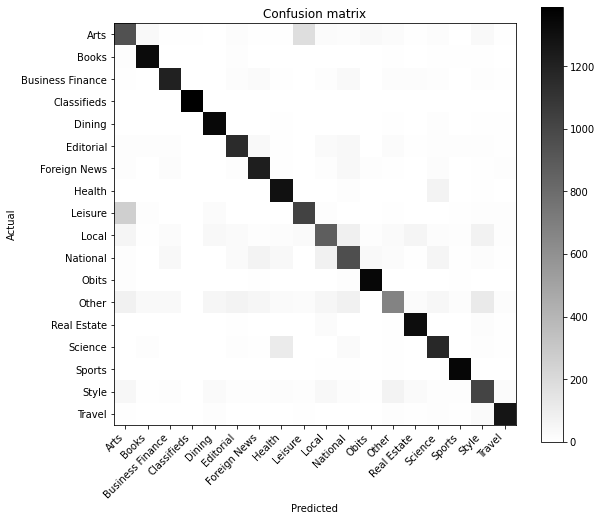

In [33]:
confusion_matrix.plot()

In [34]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_true, y_pred)
conf_df = pd.DataFrame(conf)
conf_df.columns = clf.classes_
conf_df.index = clf.classes_
conf_df.to_csv('./reports/us_categories_test_confusion_matrix_other_calibrated.csv', index_label="actual \ predicted")
print(conf_df)

                  Arts  Books  Business Finance  Classifieds  Dining  \
Arts               948     37                 9            6       2   
Books               11   1330                 3            0       3   
Business Finance    10      0              1202            0       5   
Classifieds          1      0                 0         1391       0   
Dining               4      3                 0            0    1346   
Editorial           16     11                15            0       3   
Foreign News        13      2                17            0       2   
Health               1      1                 3            0       5   
Leisure            265     12                 1            0      23   
Local               56      6                24            2      41   
National            13      4                41            2       3   
Obits               11      2                 1            1       1   
Other               78     33                38            5    